In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_excel("marketing_campaign1 (1).xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.shape

(2240, 29)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
df = df.drop('ID', axis=1)

In [12]:
# Find duplicated rows without id column
duplicated_rows_without_id = df[df.duplicated()]

# Display the duplicated rows
duplicated_rows_without_id

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
83,1963,Master,Together,38620.0,0,0,2013-05-11,56,112,17,...,3,0,0,0,0,0,0,3,11,0
179,1951,2n Cycle,Married,78497.0,0,0,2013-12-01,44,207,26,...,2,0,0,0,1,0,0,3,11,0
281,1976,Graduation,Together,51369.0,0,1,2012-10-25,84,297,7,...,8,0,0,0,0,0,0,3,11,0
282,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,7,0,0,0,0,0,0,3,11,0
363,1978,PhD,Married,37717.0,1,0,2012-11-23,31,9,0,...,9,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,2013-06-19,40,5,1,...,8,0,0,0,0,0,0,3,11,0
2221,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,26,...,1,0,1,1,0,0,0,3,11,1
2225,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,24,...,7,0,0,0,0,0,0,3,11,0
2234,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,...,7,0,0,0,0,0,0,3,11,0


      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
83          1963      Master       Together  38620.0        0         0   
179         1951    2n Cycle        Married  78497.0        0         0   
281         1976  Graduation       Together  51369.0        0         1   
282         1946  Graduation       Together  37760.0        0         0   
363         1978         PhD        Married  37717.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2218        1978  Graduation       Together  22775.0        1         0   
2221        1982      Master         Single  75777.0        0         0   
2225        1968  Graduation       Together  58554.0        1         1   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
83    2013-05-11       56

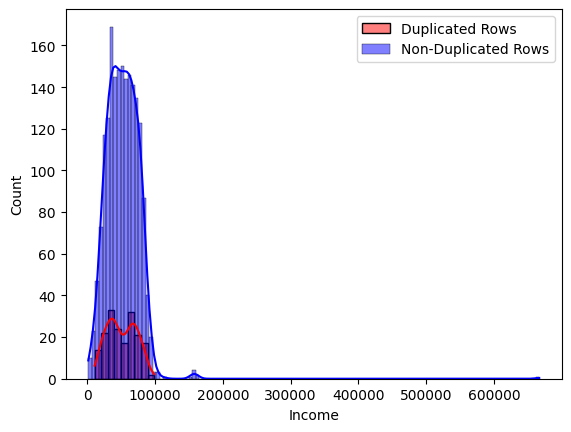

In [13]:
print(duplicated_rows_without_id)
#checking the distribution of duplicated and non-duplicated rows
sns.histplot(duplicated_rows_without_id['Income'], kde=True, color='red', label='Duplicated Rows')

non_duplicated_rows = df[~df.duplicated(keep=False)]

sns.histplot(non_duplicated_rows['Income'], kde=True, color='blue', label='Non-Duplicated Rows')

plt.legend()
plt.show()


Conclusion:As duplicated rows and non-duplicated rows have a similar distribution, we can remove the duplicated rows, as they are unlikely to add new information to analysis or model.

In [14]:
# Remove duplicated rows and keep the first occurrence
df_cleaned = df.drop_duplicates()

In [15]:
#treating missing values

df_cleaned.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


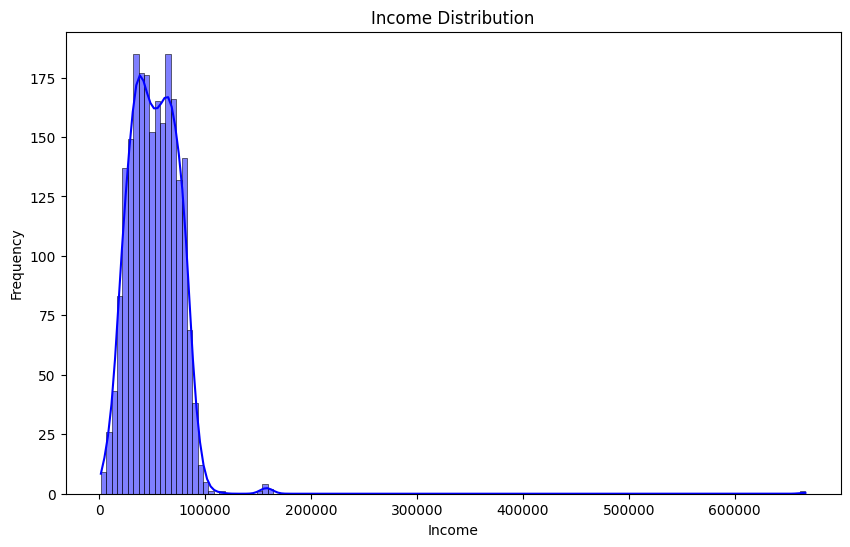

Skewness of Income: 6.763487372811116


In [16]:
# Now we have to check what value do we need to fill in place of NAN
# Plot the distribution of the Income column
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
income_skewness = df['Income'].skew()
print(f'Skewness of Income: {income_skewness}')

conclusion:The high skewness reinforces the decision to use the median for imputing missing values in the Income column, as it provides a better representation of the central value without being distorted by outliers.

In [17]:
df_cleaned['Income'].fillna(df_cleaned['Income'].median(), inplace=True)

In [18]:
# now there are no missing values
df_cleaned.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [19]:
df_cleaned['Education'] = df_cleaned['Education'].replace(['PhD','2n Cycle', 'Master'],'Post-Graduate')
df_cleaned['Education'] = df_cleaned['Education'].replace(['Graduation'], 'Graduate')
df_cleaned['Education'] = df_cleaned['Education'].replace(['Basic'], 'Under-Graduate')

In [20]:
df_cleaned['Education'] = df_cleaned['Education'].map({'Post-Graduate': 3,'Graduate':2,'Under-Graduate': 1})

In [21]:
df_cleaned['Marital_Status']=df_cleaned['Marital_Status'].replace(['Married','Together'], 'Relationship')
df_cleaned['Marital_Status']=df_cleaned['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'], 'Single')

In [22]:
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].map({'Relationship': 1,'Single': 0})

In [23]:
from datetime import datetime

# Feature Engineering
# Calculate customer age
df_cleaned['Age'] =2014- df_cleaned['Year_Birth']


# Calculate the number of children and teenagers at home
df_cleaned['children'] = df_cleaned['Kidhome'] + df_cleaned['Teenhome']

In [24]:
df_cleaned['Income'] = df_cleaned['Income'].astype(int)

In [25]:
categorical_columns = ['Marital_Status','Education','AcceptedCmp3', 'AcceptedCmp4',
                       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

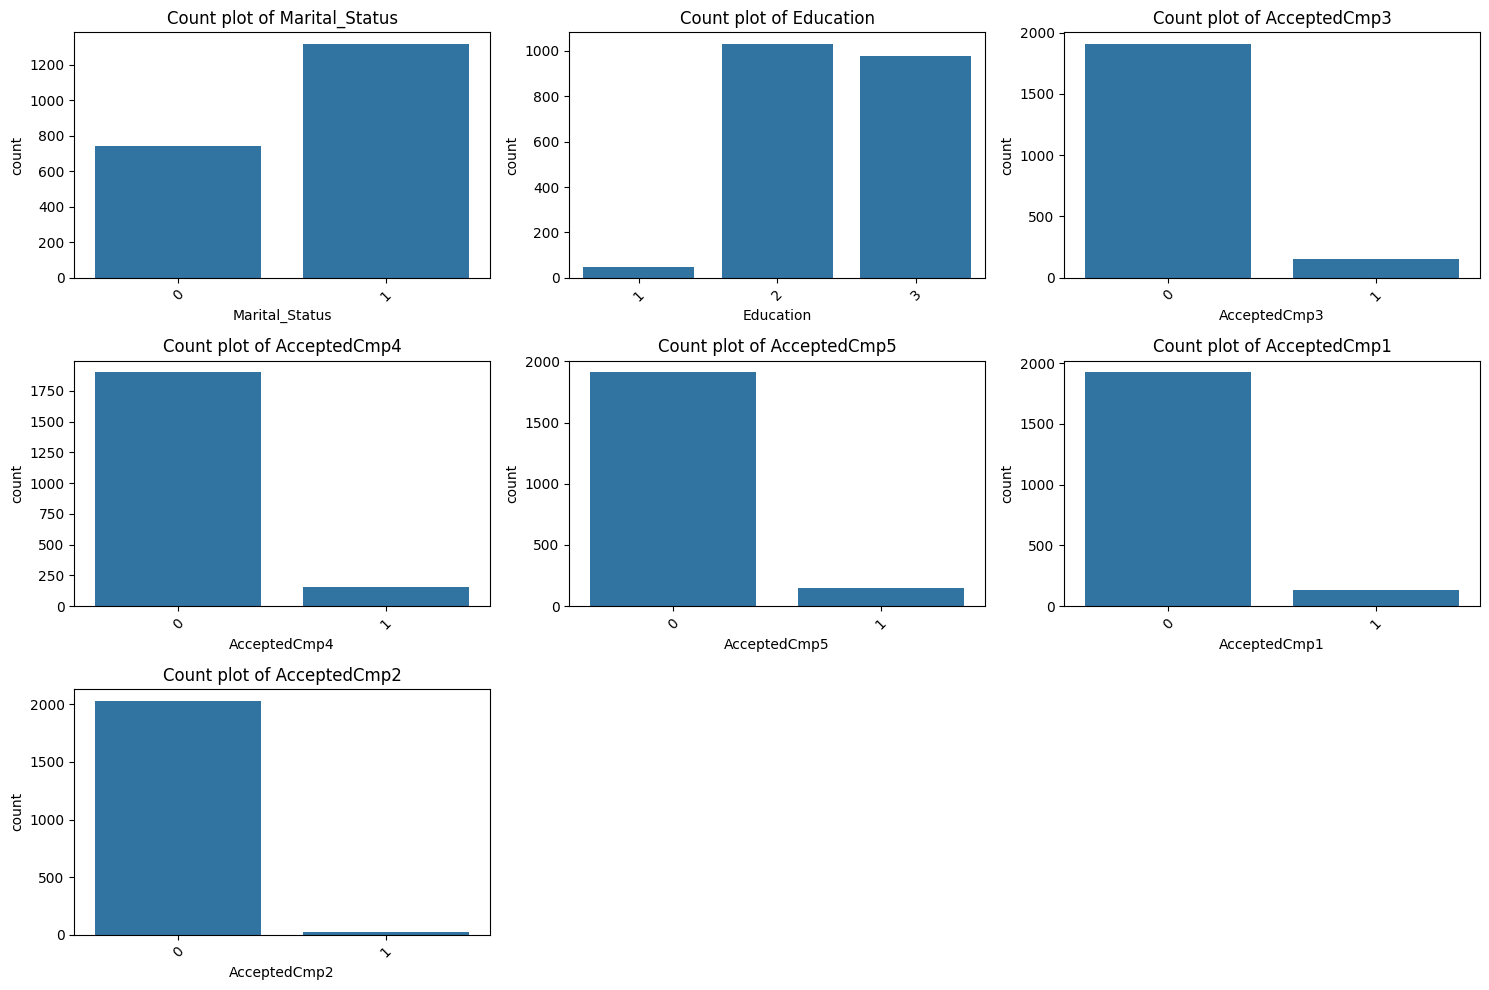

In [26]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_cleaned[column])
    plt.title(f'Count plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
columns_to_drop = ['Kidhome','Teenhome','Year_Birth','Complain', 'Z_CostContact','Z_Revenue','Dt_Customer','Response','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']

Conclusion: As the percentage of people not complaining is 99% so we can drop the column so no need to treat this imbalanced column.As the columns Z_CostContact and Z_Revenue has same values then we can drop the coumns.As Response column is highly imbalanced.

In [28]:
df_new= df_cleaned.drop(columns_to_drop, axis=1)

In [29]:
df_new

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children
0,2,0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,0
1,2,0,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,2
2,2,1,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,0
3,2,1,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,1
4,3,1,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,1,666666,23,9,14,18,8,1,12,4,3,1,3,6,37,1
2235,2,1,61223,46,709,43,182,42,118,247,2,9,3,4,5,47,1
2237,2,0,56981,91,908,48,217,32,12,24,1,2,3,13,6,33,0
2238,3,1,69245,8,428,30,214,80,30,61,2,6,5,10,3,58,1


In [30]:
numerical_col=['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumWebVisitsMonth'
       'NumCatalogPurchases','NumStorePurchases','Recency','Age']

categorical_columns = ['Marital_Status','Education' 'children']

In [31]:
df_numerical= df_new[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumWebVisitsMonth',
       'NumCatalogPurchases','NumStorePurchases','Age','Recency']]

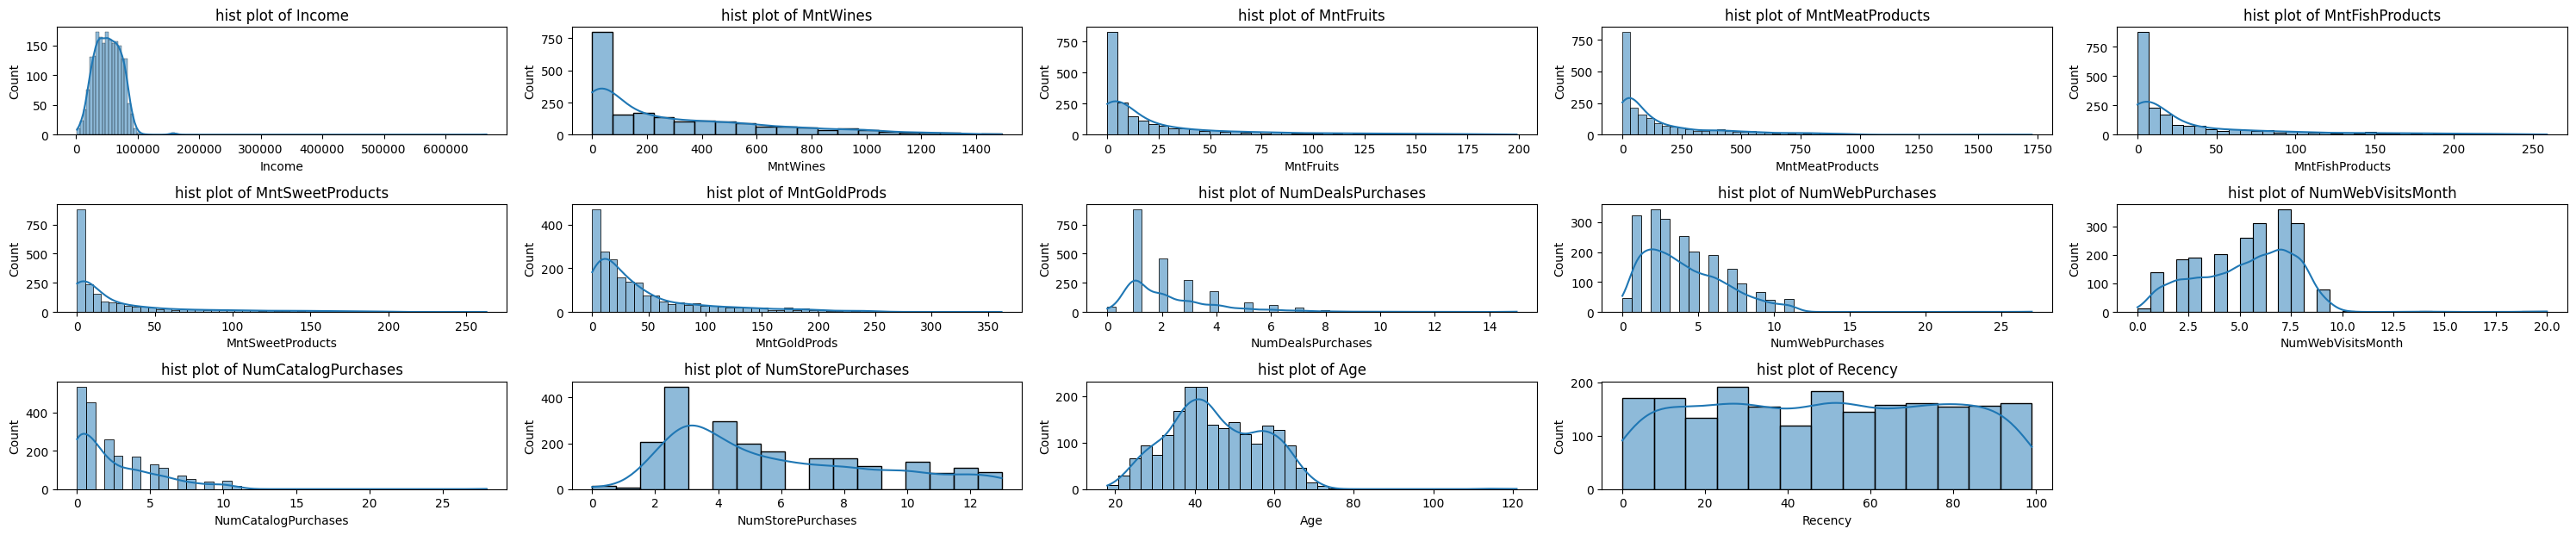

In [32]:
plt.figure(figsize=(30, 10))
for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(x=df_numerical[column],kde= True)
    plt.title(f'hist plot of {column}')
plt.tight_layout()
plt.show()

In [33]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

In [34]:
outliers = detect_outliers_iqr(df_numerical)
outliers_count = outliers.sum()
print(f"Outliers per column:\n{outliers_count}")


Outliers per column:
Income                   8
MntWines                33
MntFruits              207
MntMeatProducts        174
MntFishProducts        203
MntSweetProducts       225
MntGoldProds           187
NumDealsPurchases       78
NumWebPurchases          4
NumWebVisitsMonth        8
NumCatalogPurchases     22
NumStorePurchases        0
Age                      3
Recency                  0
dtype: int64


In [35]:
df_numerical['Age'].max()

121

In [36]:
# Applying winsorisation on these columns

In [37]:
from scipy.stats import mstats

df_new['Age'] = mstats.winsorize(df_new['Age'], limits=[0, 0.01])  # Capping the top 1%

In [38]:
df_new['MntWines'] = mstats.winsorize(df_new['MntWines'], limits=[0.05, 0.05])  # Capping the 5% and 95%

In [39]:
df_new['Income'] = mstats.winsorize(df_new['Income'], limits=[0, 0.01])  # Capping the top 1%

In [40]:
df_new['NumDealsPurchases'] = mstats.winsorize(df_new['NumDealsPurchases'], limits=[0.05, 0.05])

In [41]:
df_new['NumWebPurchases'] = mstats.winsorize(df_new['NumWebPurchases'], limits=[0.01, 0.01])

In [42]:
df_new['NumWebVisitsMonth'] = mstats.winsorize(df_new['NumWebVisitsMonth'], limits=[0.01, 0.01])

In [43]:
df_new['NumCatalogPurchases'] = mstats.winsorize(df_new['NumCatalogPurchases'], limits=[0.05, 0.05])

In [44]:
df_numerical= df_new[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumWebVisitsMonth','NumCatalogPurchases','NumStorePurchases','Age','Recency']]

In [45]:

outliers = detect_outliers_iqr(df_numerical)
outliers_count = outliers.sum()
print(f"Outliers per column:\n{outliers_count}")


Outliers per column:
Income                   0
MntWines                 0
MntFruits              207
MntMeatProducts        174
MntFishProducts        203
MntSweetProducts       225
MntGoldProds           187
NumDealsPurchases        0
NumWebPurchases          0
NumWebVisitsMonth        0
NumCatalogPurchases      0
NumStorePurchases        0
Age                      0
Recency                  0
dtype: int64


In [46]:
from sklearn.preprocessing import RobustScaler


# Define the columns to apply robust scaling
columns_to_scale = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply robust scaling to the selected columns
df_new[columns_to_scale] = scaler.fit_transform(df_new[columns_to_scale])

# Check the scaled columns
print(df_new[columns_to_scale].head())

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds
0    2.50000         2.243560         3.404255          2.442748      1.361702
1   -0.21875        -0.285714        -0.212766         -0.213740     -0.382979
2    1.28125         0.281030         2.106383          0.396947      0.382979
3   -0.12500        -0.220141        -0.042553         -0.152672     -0.404255
4    1.09375         0.238876         0.723404          0.580153     -0.191489


In [47]:
df_numerical.columns

Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases',
       'NumStorePurchases', 'Age', 'Recency'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler



# Define the columns to apply standard scaling
columns_to_std_scale = ['Income','MntWines', 'NumDealsPurchases', 'NumWebPurchases','NumWebVisitsMonth',
       'NumCatalogPurchases','NumStorePurchases','Age','Recency']

# Initialize the StandardScaler
scaler = StandardScaler()

# Applying standard scaling to the selected columns
df_new[columns_to_std_scale] = scaler.fit_transform(df_new[columns_to_std_scale])

# Checking the scaled columns
print(df_new[columns_to_std_scale].head())

     Income  MntWines  NumDealsPurchases  NumWebPurchases  NumWebVisitsMonth  \
0  0.305955  1.080738           0.496176         1.483233           0.745377   
1 -0.265459 -0.905053          -0.163469        -1.158965          -0.124970   
2  0.958814  0.415625          -0.823113         1.483233          -0.560143   
3 -1.219820 -0.905053          -0.163469        -0.781508           0.310204   
4  0.313465 -0.389511           1.815464         0.350862          -0.124970   

   NumCatalogPurchases  NumStorePurchases       Age   Recency  
0             2.421966          -0.546780  1.017928  0.312088  
1            -0.599802          -1.164383  1.275191 -0.377754  
2            -0.222081           1.306029  0.331892 -0.791659  
3            -0.977523          -0.546780 -1.297442 -0.791659  
4             0.155640           0.070823 -1.040179  1.553804  


In [49]:
pd.set_option('display.max_columns', None)

In [50]:
#This is the Dataframe after scaling
df_new.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1


In [51]:
#df_new.to_csv('preprocessed.csv', index=False)

In [52]:
df_kmeans=df_new.copy()

In [53]:
df_kmeans.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1


In [54]:
df_kmeans.shape

(2058, 17)

In [55]:
df_agglomerative=df_new.copy()

In [56]:
df_dbscan=df_new.copy()

In [57]:
df_dbscan.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook


# Perform PCA to reduce the data to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_kmeans)




In [59]:

'''
#Convert the NumPy array to a pandas DataFrame before attempting to save it to a CSV file.

# Assuming your PCA-transformed data is stored in a variable called pca_result
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])  # Use appropriate column names

'''

"\n#Convert the NumPy array to a pandas DataFrame before attempting to save it to a CSV file.\n\n# Assuming your PCA-transformed data is stored in a variable called pca_result\ndf_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])  # Use appropriate column names\n\n"

In [60]:
#df_pca.to_csv('dfpca.csv', index=False)

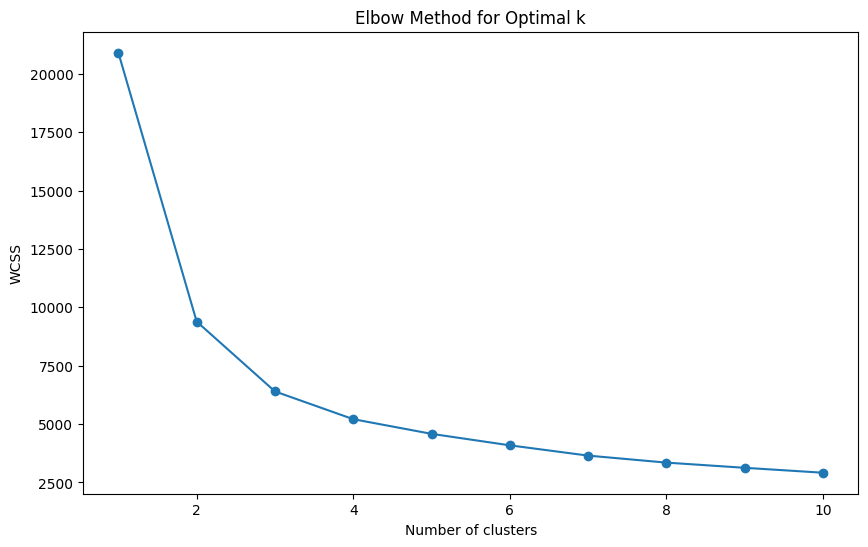

In [61]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    #kmeans.inertia_ is a measure of how well the data points are clustered around their centroids.
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each k to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

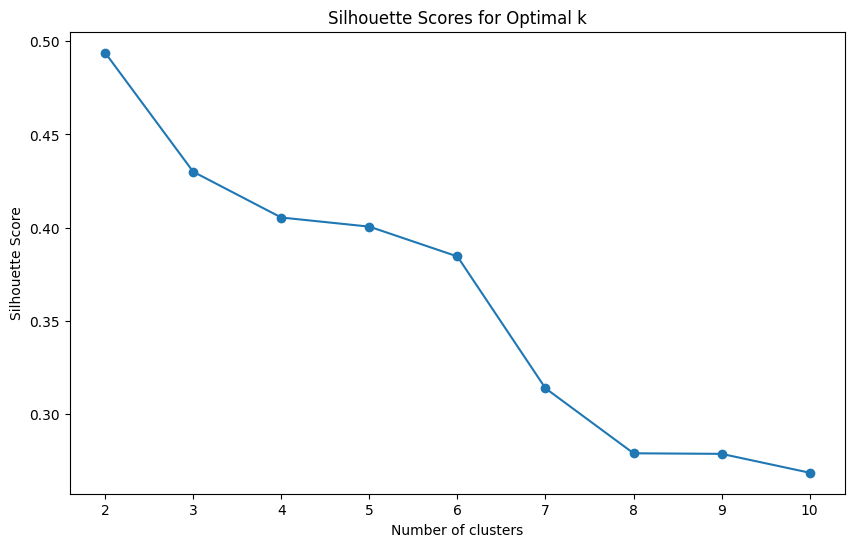

In [62]:

# Determine the optimal number of clusters using the silhouette score
silhouette_scores_avg = []
for k in range(2, 11):  # Start from 2 because silhouette score doesn't make sense for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeanslabels = kmeans.fit_predict(pca_result)
    score = silhouette_score(pca_result,kmeanslabels)
    silhouette_scores_avg.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_avg, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [63]:
# Choose the optimal k (from elbow method or highest silhouette score)
optimal_k = 2

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmean_labels_final = kmeans.fit_predict(pca_result)
df_kmeans['Cluster']=kmean_labels_final
# Analyze the clusters
cluster_profile_kmeans = df_kmeans.groupby('Cluster').mean()

# Display the cluster profiles
cluster_profile_kmeans

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children
Cluster,,,,,,,,,,,,,,,,,
0,2.449231,0.651538,-0.570404,-0.008609,-0.520475,-0.042837,-0.111911,-0.049984,-0.042584,0.010000,0.149609,-0.345690,-0.591085,-0.508536,0.445777,-0.084479,1.244615
1,2.456464,0.618734,0.978266,0.014764,0.892635,1.620589,1.472574,1.548925,1.662833,1.130859,-0.256585,0.592873,1.013734,0.872159,-0.764525,0.144884,0.457784


In [64]:
# Final dataframe for supervised learning with "Cluster" column
df_kmeans.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children,Cluster
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0,1
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2,0
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0,1
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1,0
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1,0


In [65]:
# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(pca_result, kmean_labels_final)
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')

Silhouette Score for KMeans: 0.493817827547719


In [66]:
# Check the number of features in the original data
print("Original data shape:", pca_result.shape)

# Check the number of features in the cluster centers
print("Cluster centers shape:", kmeans.cluster_centers_.shape)

# Ensure that the number of features matches
assert pca_result.shape[1] == kmeans.cluster_centers_.shape[1], "Dimensionality mismatch between the original data and KMeans cluster centers."

Original data shape: (2058, 3)
Cluster centers shape: (2, 3)


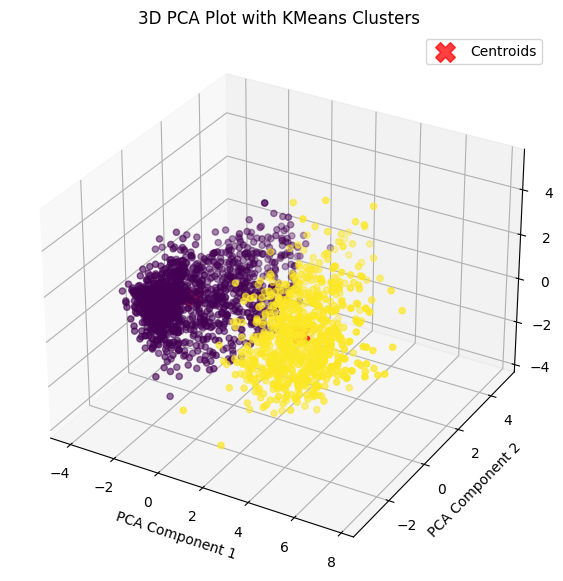

In [67]:


# Transform the cluster centroids into the PCA space
centroids_pca = kmeans.cluster_centers_

# Plotting the PCA results in 3D with the KMeans cluster labels
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using the first three principal components for 3D plotting
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df_kmeans['Cluster'], cmap='viridis', marker='o')

# Plot the centroids in the PCA-transformed space
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Set plot titles and labels
ax.set_title('3D PCA Plot with KMeans Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

# Show the plot with interactive 3D rotation
plt.show()


In [68]:
df_kmeans.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children,Cluster
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0,1
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2,0
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0,1
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1,0
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1,0


When performing PCA, make sure you are not including the Cluster column. PCA should be done on the original features only.

In [69]:
#plt.show(block=True)

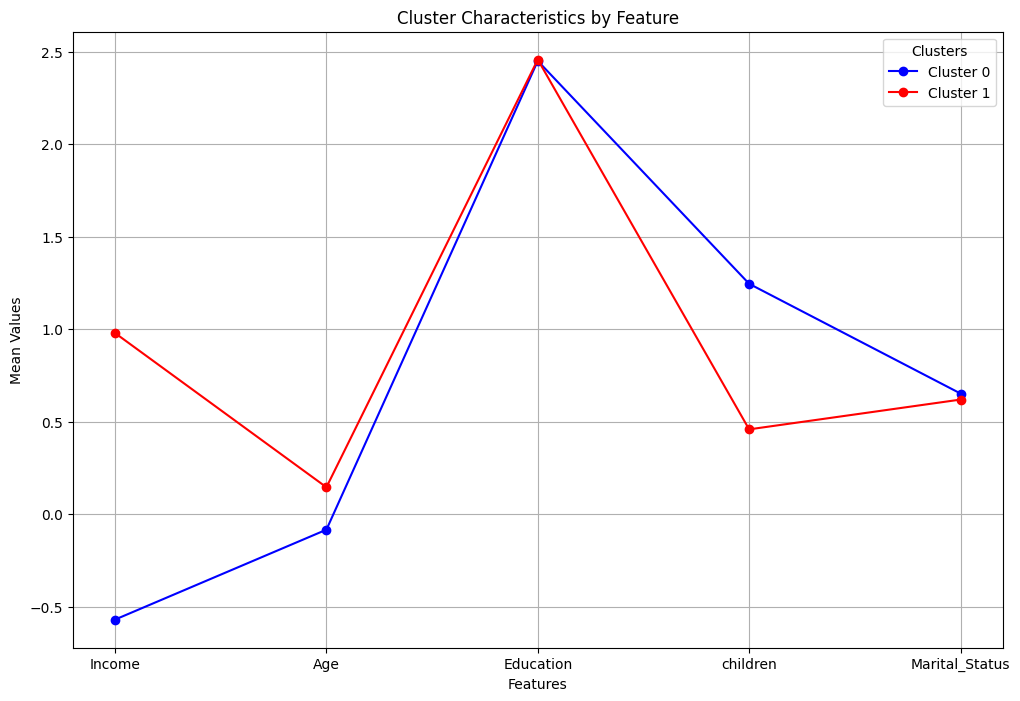

In [70]:


# Assume we have a DataFrame 'cluster_profile_kmeans' that contains mean values for each cluster

# Key features to analyze
features = ['Income', 'Age', 'Education', 'children', 'Marital_Status']

# Plotting the characteristics of each cluster
plt.figure(figsize=(12, 8))

# Plot for Cluster 0
plt.plot(features, cluster_profile_kmeans.loc[0, features], marker='o', linestyle='-', color='blue', label='Cluster 0')

# Plot for Cluster 1
plt.plot(features, cluster_profile_kmeans.loc[1, features], marker='o', linestyle='-', color='red', label='Cluster 1')


# Adding title and labels
plt.title('Cluster Characteristics by Feature')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

Cluster 0:

Tends to have lower income.

Has older individuals.

More educated individuals.

Fewer children.


Cluster 1:

Tends to have higher income.

Has younger individuals.

Less educated individuals.

More children.


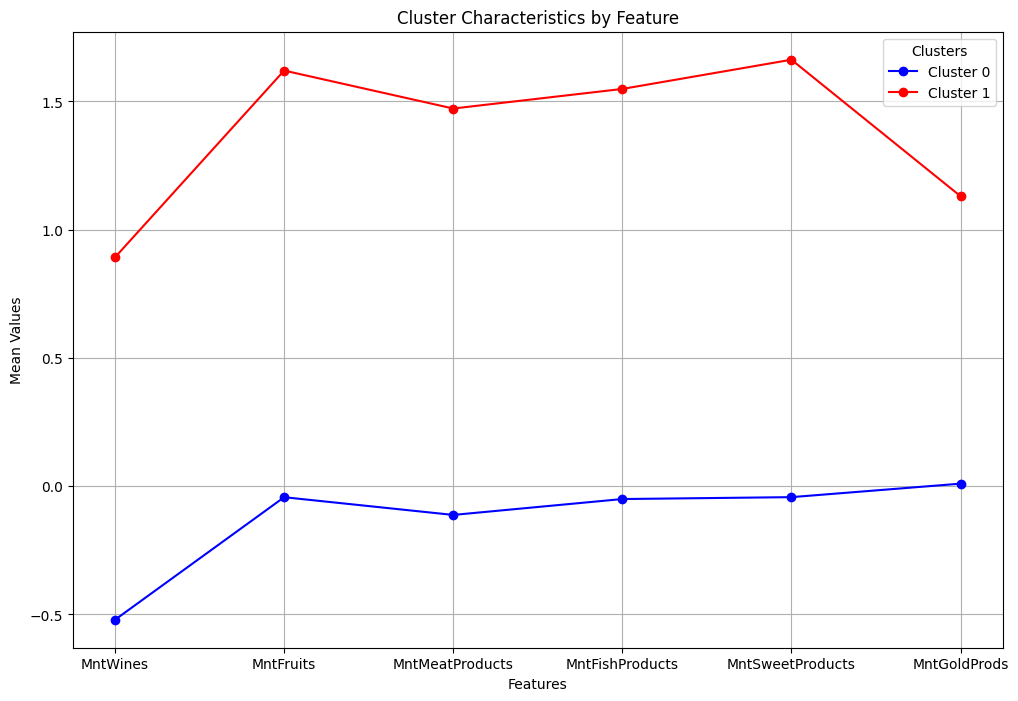

In [71]:
# Assume we have a DataFrame 'cluster_profile_kmeans' that contains mean values for each cluster

# Key features to analyze
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

# Plotting the characteristics of each cluster
plt.figure(figsize=(12, 8))

# Plot for Cluster 0
plt.plot(features, cluster_profile_kmeans.loc[0, features], marker='o', linestyle='-', color='blue', label='Cluster 0')

# Plot for Cluster 1
plt.plot(features, cluster_profile_kmeans.loc[1, features], marker='o', linestyle='-', color='red', label='Cluster 1')

# Adding title and labels
plt.title('Cluster Characteristics by Feature')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

Cluster 1:

Tends to have higher spending across all product categories.

They especially stand out in their spending on wines, fruits, and gold products.

This cluster represents customers who are likely to be bigger spenders overall, especially on high-value items such as wine and gold.

Cluster 0:

This cluster consistently shows lower spending in all product categories.

Their spending is particularly low in the wine and fruits categories, where they have near-zero or negative values.

This group represents a lower-spending segment of customers.


Product Promotions:

Cluster 1 could be marketed with offers focused on wine and gold products, since they are likely to spend more in these categories.

Cluster 0 might be better targeted with promotions for staple items like meat and fish products at competitive prices.

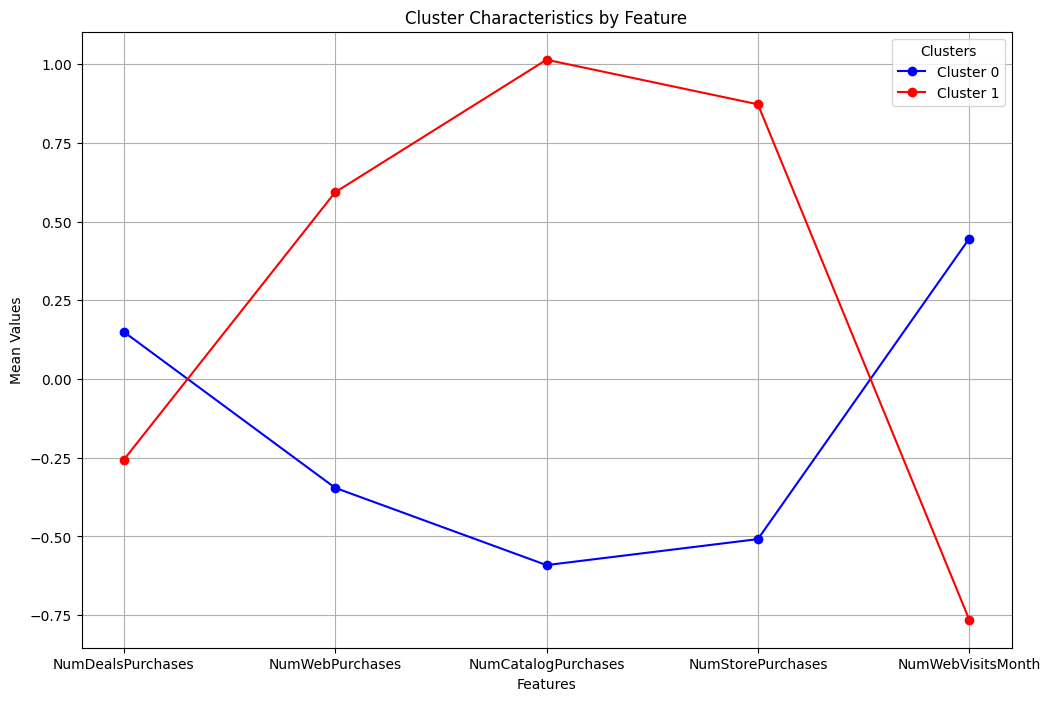

In [72]:
# Assume we have a DataFrame 'cluster_profile_kmeans' that contains mean values for each cluster

# Key features to analyze
features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting the characteristics of each cluster
plt.figure(figsize=(12, 8))

# Plot for Cluster 0
plt.plot(features, cluster_profile_kmeans.loc[0, features], marker='o', linestyle='-', color='blue', label='Cluster 0')

# Plot for Cluster 1
plt.plot(features, cluster_profile_kmeans.loc[1, features], marker='o', linestyle='-', color='red', label='Cluster 1')

# Adding title and labels
plt.title('Cluster Characteristics by Feature')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

Cluster 0 (Blue):

Higher web visits: This group spends more time visiting websites but does not convert as many visits into web purchases.

Less deal-driven: They are less likely to take advantage of deals or discounts.
More store-oriented: They are slightly more inclined to make purchases in physical stores, but still lower overall purchasing behavior compared to Cluster 1.

Cluster 1 (Red):

More deal-driven: This group makes more purchases through deals and discounts.
Higher online and catalog purchases: They are more likely to buy products online and via catalogs, indicating more engagement with remote shopping options.

Fewer web visits but higher conversion: Despite visiting websites less often, this group converts their visits into web purchases more effectively.

Cluster 0 is more web-browsing oriented but less likely to make online purchases or take advantage of deals.

Cluster 1 is more deal-driven, with a higher tendency to purchase through online platforms and catalogs, but they visit websites less frequently.

In [73]:
#agglomerative

In [74]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

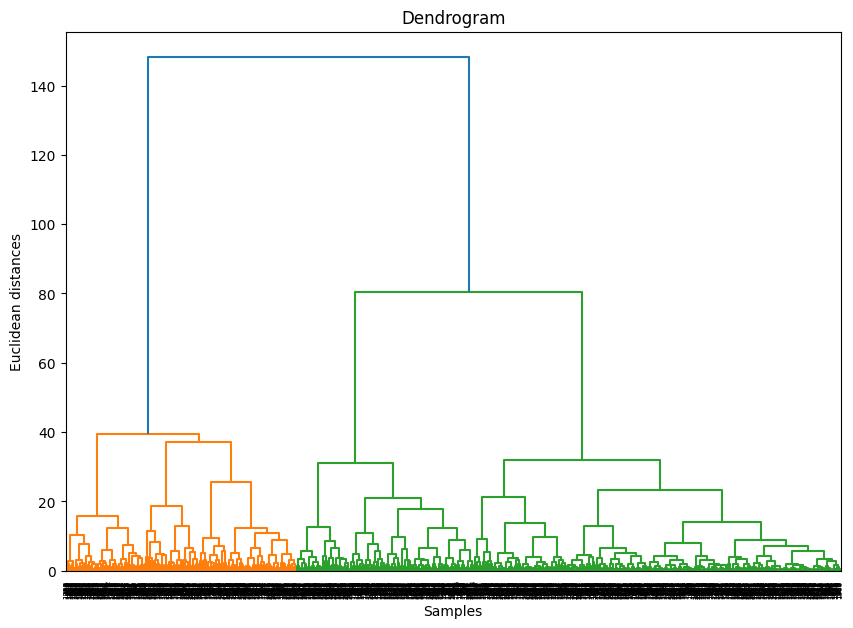

In [75]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_result, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [76]:
n_clusters = 2

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(pca_result)

In [77]:
# Assuming agg_labels is the array of cluster labels
# And df_agglomerative is original DataFrame

#  Assigning the cluster labels to the original DataFrame as a new column
df_agglomerative['Cluster_Labels'] = agg_labels


df_agglomerative.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children,Cluster_Labels
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0,1
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2,0
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0,1
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1,0
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1,0


In [78]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(pca_result, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg}')


Silhouette Score for Agglomerative Clustering: 0.48531358353333975


In [79]:
df_agglomerative.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children,Cluster_Labels
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0,1
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2,0
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0,1
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1,0
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1,0


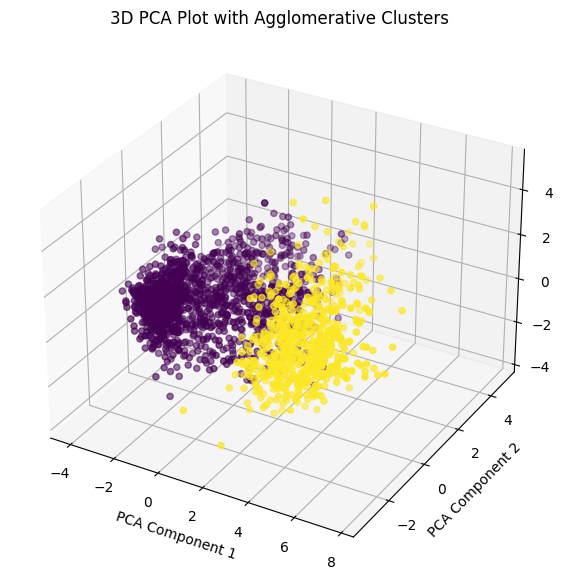

In [80]:


# Plotting the PCA results in 3D with the Agglomerative cluster labels
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using the first three principal components for 3D plotting
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],c=df_agglomerative['Cluster_Labels'], cmap='viridis', marker='o')



ax.set_title('3D PCA Plot with Agglomerative Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

In [81]:
#df_agglomerative.to_csv('dfagg.csv', index=False)

In [82]:
# Grouping the data by the cluster labels and calculating the mean of each feature for each cluster
cluster_analysis_agg = df_agglomerative.groupby('Cluster_Labels').mean()



# Display the cluster analysis results
cluster_analysis_agg

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children
Cluster_Labels,,,,,,,,,,,,,,,,,
0,2.465052,0.645675,-0.450009,-0.008724,-0.355560,0.013343,-0.042067,0.001399,0.012679,0.095089,0.174342,-0.21911,-0.461522,-0.361071,0.386096,-0.022401,1.207612
1,2.420881,0.624796,1.060788,0.020565,0.838147,1.881627,1.682729,1.806012,1.935968,1.195411,-0.410970,0.51650,1.087927,0.851139,-0.910127,0.052806,0.358891


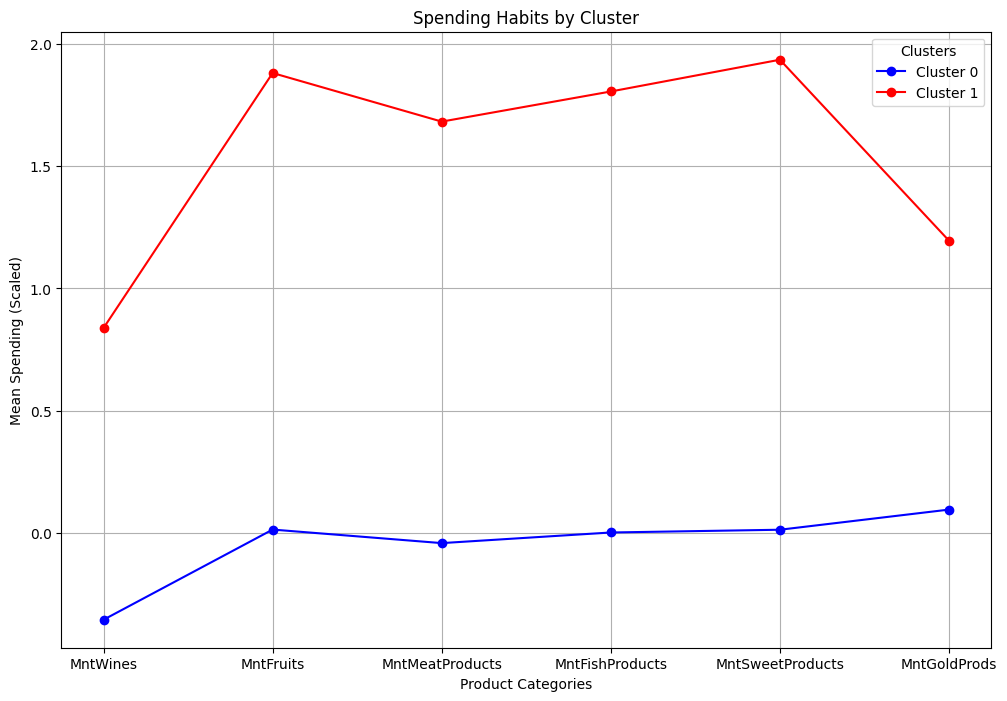

In [83]:
# Plotting the spending habits of each cluster
plt.figure(figsize=(12, 8))

# Product categories to plot
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
#categories=['Education','Marital_Status','Income','children','Age']
# Plot for Cluster 0
plt.plot(categories, cluster_analysis_agg.loc[0, categories], marker='o', linestyle='-', color='blue', label='Cluster 0')

# Plot for Cluster 1
plt.plot(categories, cluster_analysis_agg.loc[1, categories], marker='o', linestyle='-', color='red', label='Cluster 1')


# Adding title and labels
plt.title('Spending Habits by Cluster')
plt.xlabel('Product Categories')
plt.ylabel('Mean Spending (Scaled)')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

Cluster 1 (red):

Higher spending across all product categories, especially on wines, fruits, and gold products.

This cluster represents high spenders or premium customers who invest in a variety of categories, particularly luxury or premium products.

They seem to prioritize categories like wine, fruits, and gold, which could suggest that they have higher disposable income.

Cluster 0 (blue):

Lower spending across all categories, with spending almost flat for most product categories, particularly for wine, fruits, and gold products.

This cluster represents a lower spending group, likely more focused on staple products, and spends very little on luxury or premium items.

Their spending habits suggest a more conservative approach to spending or lower disposable income.

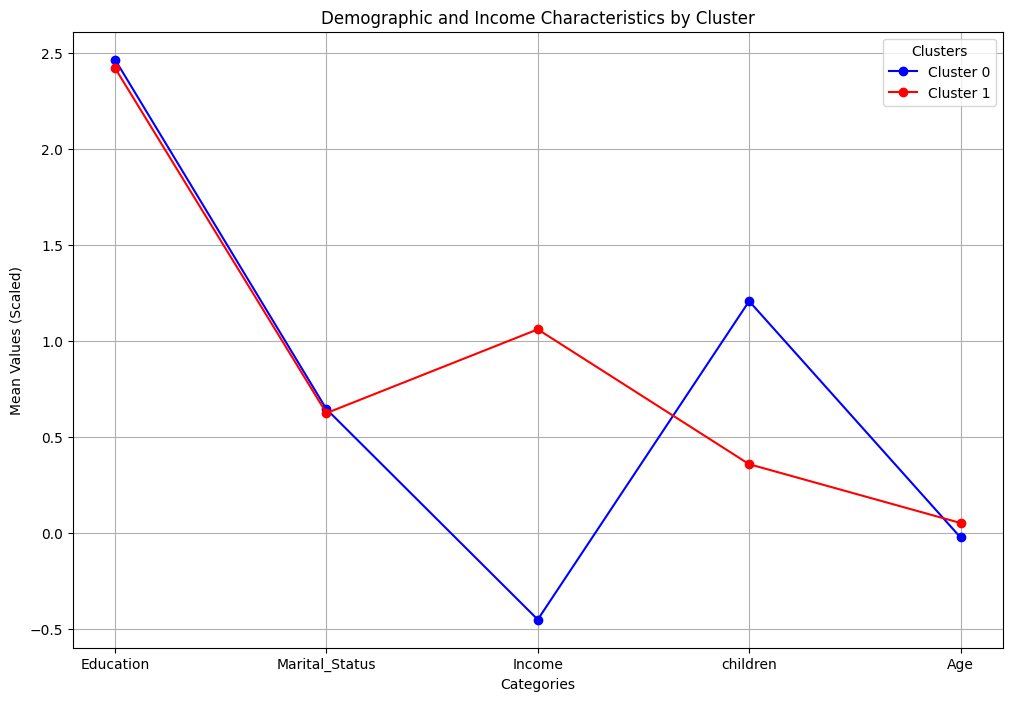

In [84]:
# Plotting the demographic and income characteristics of each cluster
plt.figure(figsize=(12, 8))

# Columns to plot (Education, Marital_Status, Income, children, Age)
categories = ['Education', 'Marital_Status', 'Income', 'children', 'Age']

# Plot for Cluster 0
plt.plot(categories, cluster_analysis_agg.loc[0, categories], marker='o', linestyle='-', color='blue', label='Cluster 0')

# Plot for Cluster 1
plt.plot(categories, cluster_analysis_agg.loc[1, categories], marker='o', linestyle='-', color='red', label='Cluster 1')

# Adding title and labels
plt.title('Demographic and Income Characteristics by Cluster')
plt.xlabel('Categories')
plt.ylabel('Mean Values (Scaled)')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

Cluster 0 (Blue):
Higher number of children: This cluster has significantly more children on average.

Lower income: The individuals in this cluster have much lower income compared to Cluster 1.

Older: This cluster represents older individuals with more children.

Similar education and marital status: Education and marital status are similar to Cluster 1.

Cluster 1 (Red):
Higher income: This cluster represents individuals with higher income.

Younger: Members of this cluster tend to be younger.

Fewer children: Individuals in this group have fewer children on average.

Similar education and marital status: This cluster shares a similar education level and marital status as Cluster 0.

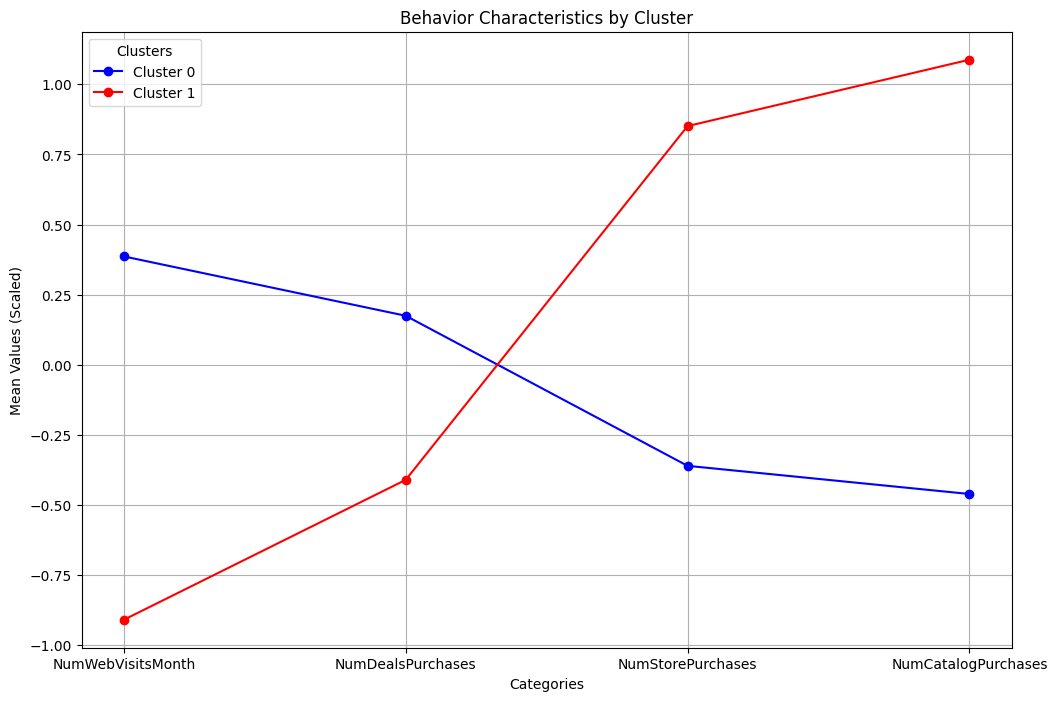

In [85]:
# Plotting the behavior characteristics of each cluster
plt.figure(figsize=(12, 8))

# Columns to plot (NumWebVisitsMonth, NumDealsPurchases, NumStorePurchases, NumCatalogPurchases)
categories = ['NumWebVisitsMonth', 'NumDealsPurchases', 'NumStorePurchases', 'NumCatalogPurchases']

# Plot for Cluster 0
plt.plot(categories, cluster_analysis_agg.loc[0, categories], marker='o', linestyle='-', color='blue', label='Cluster 0')

# Plot for Cluster 1
plt.plot(categories, cluster_analysis_agg.loc[1, categories], marker='o', linestyle='-', color='red', label='Cluster 1')

# Adding title and labels
plt.title('Behavior Characteristics by Cluster')
plt.xlabel('Categories')
plt.ylabel('Mean Values (Scaled)')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

Cluster 0 (Blue):

Higher web visits: This cluster tends to visit websites more frequently, possibly for research or browsing, but this does not necessarily translate into purchases.

Less purchasing through deals and stores: They are less likely to buy products on deals and are less active in making store purchases.

Lower overall purchasing behavior: In general, this cluster seems to exhibit lower purchasing activity across all categories except web visits.

Cluster 1 (Red):
Fewer web visits: This cluster makes fewer web visits compared to Cluster 0.

More active in purchases: Cluster 1 has significantly higher activity in buying products through deals, store purchases, and catalog purchases.

Deal-oriented buyers: They are more inclined to take advantage of deals and promotions.

In [86]:
# DBSCAN

In [88]:
'''
from sklearn.linear_model import Ridge

# Define the Ridge regression model with regularization
model = Ridge(alpha=1.0)  # You can adjust alpha to control regularization strength

# Train the model
model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = model.predict(X_test)

# Example evaluation (you can use your own evaluation metrics)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
'''

"\nfrom sklearn.linear_model import Ridge\n\n# Define the Ridge regression model with regularization\nmodel = Ridge(alpha=1.0)  # You can adjust alpha to control regularization strength\n\n# Train the model\nmodel.fit(X_train, y_train)\n\n# Evaluate on the test set\ny_pred = model.predict(X_test)\n\n# Example evaluation (you can use your own evaluation metrics)\nfrom sklearn.metrics import mean_squared_error\nmse = mean_squared_error(y_test, y_pred)\nprint(f'Mean Squared Error: {mse}')\n"

In [89]:
from sklearn.cluster import DBSCAN


#Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=7)
dbscan_labels = dbscan.fit_predict(pca_result)

# Add DBSCAN labels to the dataframe
df_dbscan['DBSCAN_Cluster'] = dbscan_labels
df_dbscan['DBSCAN_Cluster'].unique()

array([ 0, -1])

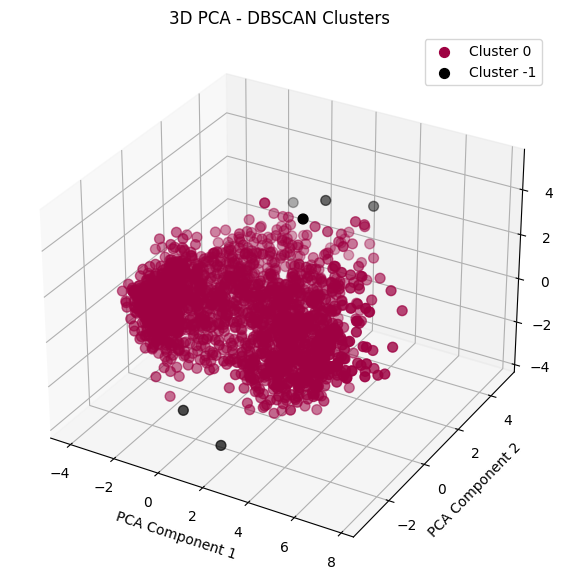

In [90]:
# Calculate the Silhouette Score
# Silhouette score is only defined if there is more than one cluster

'''
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) < len(dbscan_labels):
    score = silhouette_score(pca_result_kmeans, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {score}')
else:
    print('Silhouette Score is not defined for this configuration of clusters.')

'''
import matplotlib.pyplot as plt

# Step 7: Visualize the DBSCAN clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with DBSCAN cluster labels
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise.
        color = 'k'
    class_member_mask = (dbscan_labels == label)
    xyz = pca_result[class_member_mask]
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, s=50, label=f'Cluster {label}')

ax.set_title('3D PCA - DBSCAN Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.legend()
plt.show()

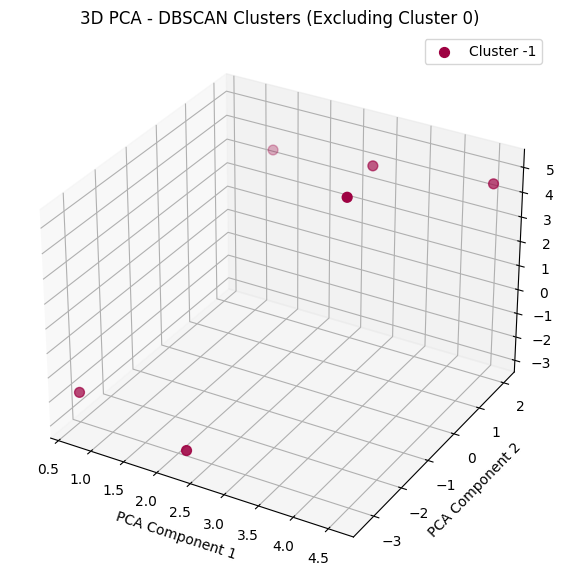

In [91]:
# Mask for excluding Cluster 0
mask = dbscan_labels != 0

# Plot the remaining clusters without Cluster 0
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(dbscan_labels[mask])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    class_member_mask = (dbscan_labels == label)
    xyz = pca_result[class_member_mask & mask]
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, s=50, label=f'Cluster {label}')

ax.set_title('3D PCA - DBSCAN Clusters (Excluding Cluster 0)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.legend()
plt.show()

In [92]:
# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(pca_result, kmean_labels_final)
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')

# Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(pca_result, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

# Silhouette Score for Agglomerative Clustering
silhouette_agglomerative = silhouette_score(pca_result, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglomerative}')

Silhouette Score for KMeans: 0.493817827547719
Silhouette Score for DBSCAN: 0.333670021420122
Silhouette Score for Agglomerative Clustering: 0.48531358353333975


 Kmeans Clustering has the highest Silhouette score, it is a strong indication that it is the most appropriate clustering method

# Supervised learning Algorithms for classification



In [93]:
df=df_kmeans.copy()

In [94]:
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,children,Cluster
0,2,0,0.305955,0.312088,1.080738,2.50000,2.243560,3.404255,2.442748,1.361702,0.496176,1.483233,2.421966,-0.546780,0.745377,1.017928,0,1
1,2,0,-0.265459,-0.377754,-0.905053,-0.21875,-0.285714,-0.212766,-0.213740,-0.382979,-0.163469,-1.158965,-0.599802,-1.164383,-0.124970,1.275191,2,0
2,2,1,0.958814,-0.791659,0.415625,1.28125,0.281030,2.106383,0.396947,0.382979,-0.823113,1.483233,-0.222081,1.306029,-0.560143,0.331892,0,1
3,2,1,-1.219820,-0.791659,-0.905053,-0.12500,-0.220141,-0.042553,-0.152672,-0.404255,-0.163469,-0.781508,-0.977523,-0.546780,0.310204,-1.297442,1,0
4,3,1,0.313465,1.553804,-0.389511,1.09375,0.238876,0.723404,0.580153,-0.191489,1.815464,0.350862,0.155640,0.070823,-0.124970,-1.040179,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,1,2.074560,-0.895135,-0.911417,0.18750,-0.229508,-0.085106,-0.213740,-0.255319,1.155820,-0.404051,-0.599802,-0.855581,0.310204,-0.697161,1,0
2235,2,1,0.455422,-0.101817,1.316232,1.09375,0.538642,0.638298,3.358779,4.744681,-0.163469,1.860689,0.155640,-0.546780,-0.124970,0.160383,1,1
2237,2,0,0.249899,1.450328,1.949521,1.25000,0.702576,0.425532,0.122137,0.000000,-0.823113,-0.781508,0.155640,2.232434,0.310204,-1.040179,0,1
2238,3,1,0.844085,-1.412517,0.421990,0.68750,0.688525,1.446809,0.671756,0.787234,-0.163469,0.728319,0.911082,1.306029,-0.995316,1.103682,1,1


In [95]:
df.isnull().sum()

,0
Education,0
Marital_Status,0
Income,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [96]:
df.shape

(2058, 18)

In [97]:
from sklearn.model_selection import train_test_split

# df is your DataFrame and 'Cluster' is the target variable
X = df.drop('Cluster', axis=1)  # Features
y = df['Cluster']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Classification report and confusion matrix
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 96.60%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       268
           1       0.94      0.97      0.95       144

    accuracy                           0.97       412
   macro avg       0.96      0.97      0.96       412
weighted avg       0.97      0.97      0.97       412

Random Forest Confusion Matrix:
 [[259   9]
 [  5 139]]


I am checking whether my model is overfitting,underfitting or well-fitted

In [100]:

# Now, evaluate train and test accuracy
train_accuracy = rf.score(X_train_scaled, y_train)
test_accuracy = rf.score(X_test_scaled, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Training Accuracy: 1.0
Test Accuracy: 0.9660194174757282


In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')


Cross-Validation Scores: [0.97572816 0.97330097 0.97330097 0.97080292 0.97810219]
Mean Cross-Validation Score: 0.974247041315286


In [102]:
#XG BOOST

In [103]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

# Classification report and confusion matrix
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost Accuracy: 96.84%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       268
           1       0.94      0.97      0.96       144

    accuracy                           0.97       412
   macro avg       0.96      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412

XGBoost Confusion Matrix:
 [[259   9]
 [  4 140]]


In [104]:
# Now, evaluate train and test accuracy for xgb
train_accuracy = xgb.score(X_train_scaled, y_train)
test_accuracy = xgb.score(X_test_scaled, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.9684466019417476


In [105]:
from sklearn.model_selection import cross_val_score

# Random Forest cross-validation
cv_scores_rf = cross_val_score(rf, X, y, cv=10)
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean() * 100:.2f}%")

# XGBoost cross-validation
cv_scores_xgb = cross_val_score(xgb, X, y, cv=10)
print(f"XGBoost Cross-Validation Accuracy: {cv_scores_xgb.mean() * 100:.2f}%")

Random Forest Cross-Validation Accuracy: 97.09%
XGBoost Cross-Validation Accuracy: 97.62%


Hyperparameter Tuning:

You can use GridSearchCV or RandomizedSearchCV to perform hyperparameter optimization and potentially improve the performance of both models.

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'lambda': [0.1, 1.0, 10.0],  # L2 regularization
    'alpha': [0.1, 1.0, 10.0],   # L1 regularization
    'gamma': [0, 0.1, 0.2]  # Pruning
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'alpha': 0.1, 'gamma': 0.2, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.9799484203739522


In [112]:
# Initialize the XGBoost model with the best parameters
xgb_best = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    alpha=2.0,
    gamma=0.2,
    lambda_=2.0
)

# Train the model on the scaled training data
xgb_best.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
test_accuracy = xgb_best.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9733009708737864


In [113]:
train_accuracy = xgb_best.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9987849331713244


In [114]:
# Define the best parameters for the XGBoost model
final_model = XGBClassifier(
    n_estimators=200,       # Number of trees
    learning_rate=0.1,      # Step size shrinkage to prevent overfitting
    max_depth=3,            # Maximum depth of a tree
    alpha=2.0,              # L1 regularization (Lasso)
    gamma=0.2,              # Minimum loss reduction required for a split
    lambda_=2.0,            # L2 regularization (Ridge)
    random_state=42         # For reproducibility
)

# Train the final model on the scaled training data
final_model.fit(X_train_scaled, y_train)

XGBClassifier(alpha=2.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda_=2.0, learning_rate=0.1,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, ...)

In [115]:
# Evaluate the model on the test data
test_accuracy = final_model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Evaluate the model on the training data
train_accuracy = final_model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy}")

Test Accuracy: 0.9733009708737864
Training Accuracy: 0.9987849331713244


In [116]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       268
           1       0.79      1.00      0.88       144

    accuracy                           0.91       412
   macro avg       0.90      0.93      0.90       412
weighted avg       0.93      0.91      0.91       412



Validation Curve for alpha (L1 Regularization)

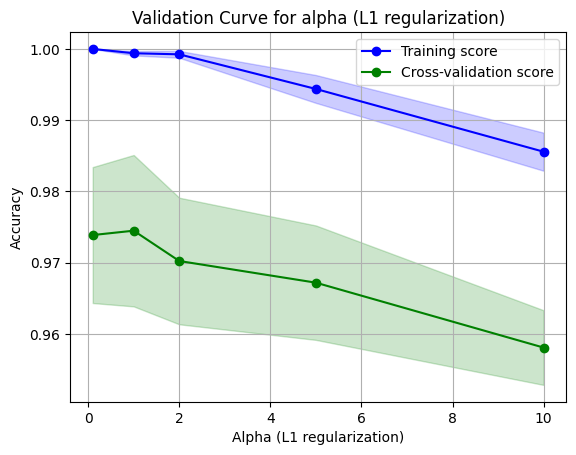

In [117]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter range for alpha (L1 regularization)
param_range = [0.1, 1.0, 2.0, 5.0, 10.0]

# Compute the validation curve for alpha
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, gamma=0.2, lambda_=2.0),
    X_train_scaled, y_train, param_name="alpha", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label="Training score", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker='o')

# Add fill_between for standard deviation
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

# Customize the plot
plt.title("Validation Curve for alpha (L1 regularization)")
plt.xlabel("Alpha (L1 regularization)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Steps to Save and Load a Model using Pickle:

Save the Final Model Using Pickle

In [119]:
import pickle

# Save the final model to a file using pickle
with open('final_xgboost_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

Load the Model from the File

In [120]:
# Load the model from the file
with open('final_xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

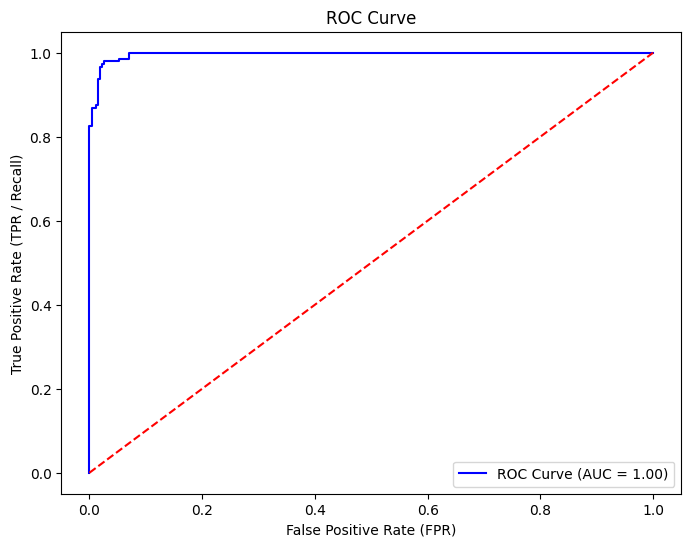

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1) using the scaled test data
y_pred_prob = loaded_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

# Compute True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

conclusion: AUC score of 1.00 indicates perfect classification on test data.The model separates the positive and negative classes perfectly, meaning that it is highly accurate and efficient in predicting the outcome.